In [17]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [31]:
def Hide(cover,message):
  #Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
  lstc = []
  lstm = []
  for i in range(cover.shape[0]):
    for j in range(cover.shape[1]):
         lstc.append(np.binary_repr(cover[i][j] ,width=8)) # width = no. of bits
  for i in range(message.shape[0]):
    for j in range(message.shape[1]):
         lstm.append(np.binary_repr(message[i][j] ,width=8))
 
  # We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
  # Multiply with 2^(n-1) and reshape to reconstruct the bit image.
  eight_bit_img = (np.array([int(i[0]) for i in lstc],dtype = np.uint8) * 128).reshape(cover.shape[0],cover.shape[1]) 
  seven_bit_img = (np.array([int(i[1]) for i in lstc],dtype = np.uint8) * 64).reshape(cover.shape[0],cover.shape[1])
  six_bit_img = (np.array([int(i[2]) for i in lstc],dtype = np.uint8) * 32).reshape(cover.shape[0],cover.shape[1])
  five_bit_img = (np.array([int(i[3]) for i in lstc],dtype = np.uint8) * 16).reshape(cover.shape[0],cover.shape[1])
  four_bit_img = (np.array([int(i[0]) for i in lstm],dtype = np.uint8) * 8).reshape(message.shape[0],message.shape[1])
  three_bit_img = (np.array([int(i[1]) for i in lstm],dtype = np.uint8) * 4).reshape(message.shape[0],message.shape[1])
  two_bit_img = (np.array([int(i[2]) for i in lstm],dtype = np.uint8) * 2).reshape(message.shape[0],message.shape[1])
  one_bit_img = (np.array([int(i[3]) for i in lstm],dtype = np.uint8) * 1).reshape(message.shape[0],message.shape[1])
 
  # #Concatenate these images for ease of display using cv2.hconcat()
  # finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
  # finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])
 
  # # Vertically concatenate
  # final = cv2.vconcat([finalr,finalv])
  final = eight_bit_img+seven_bit_img+six_bit_img+five_bit_img+four_bit_img+three_bit_img+two_bit_img+one_bit_img
  print("stego file")
  # Display the images
  

  # print("4bit cover image")
  # # Combining 4 bit planes
  # new_img = eight_bit_img+seven_bit_img+six_bit_img+five_bit_img
  # # Display the image
  # cv2_imshow(new_img)
  # cv2.waitKey(0)
  return final


In [36]:
def retrieve(stegoimage):
  lstc = []
  for i in range(stegoimage.shape[0]):
    for j in range(stegoimage.shape[1]):
         lstc.append(np.binary_repr(stegoimage[i][j] ,width=8)) # width = no. of bits
  eight_bit_img = (np.array([int(i[4]) for i in lstc],dtype = np.uint8) * 128).reshape(stegoimage.shape[0],stegoimage.shape[1]) 
  seven_bit_img = (np.array([int(i[5]) for i in lstc],dtype = np.uint8) * 64).reshape(stegoimage.shape[0],stegoimage.shape[1])
  six_bit_img = (np.array([int(i[6]) for i in lstc],dtype = np.uint8) * 32).reshape(stegoimage.shape[0],stegoimage.shape[1])
  five_bit_img = (np.array([int(i[7]) for i in lstc],dtype = np.uint8) * 16).reshape(stegoimage.shape[0],stegoimage.shape[1])
  new_img = eight_bit_img+seven_bit_img+six_bit_img+five_bit_img
  return new_img

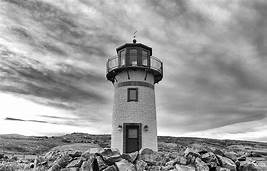

stego file


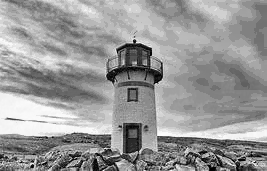

message image


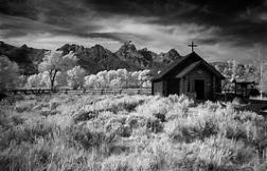

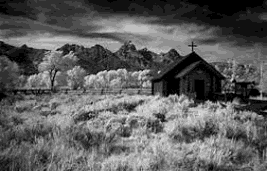

In [37]:

# Read the image in greyscale
cover = cv2.imread('/content/th.jpg',0)
cv2_imshow(cover)
message =cv2.imread('/content/msg.jpg',0) 
message = cv2.resize(message, (267,171), interpolation = cv2.INTER_AREA)
stego=Hide(cover,message)
cv2_imshow(stego)
# cv2.waitKey(0) 
print("message image")
cv2_imshow(message)
retrivedimage = retrieve(stego)
cv2_imshow(retrivedimage)